In [2]:
#%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
%load_ext kedro.ipython

[06/21/24 00:01:41] INFO     Registered line magic '%reload_kedro'                                   ]8;id=67273;file://C:\Users\dggua\anaconda3\envs\test_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=543276;file://C:\Users\dggua\anaconda3\envs\test_env\lib\site-packages\kedro\ipython\__init__.py#51\51]8;;\

[06/21/24 00:01:42] INFO     Registered line magic '%load_node'                                      ]8;id=696700;file://C:\Users\dggua\anaconda3\envs\test_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=591272;file://C:\Users\dggua\anaconda3\envs\test_env\lib\site-packages\kedro\ipython\__init__.py#53\53]8;;\

                    INFO     Resolved project path as:                                              ]8;id=981748;file://C:\Users\dggua\anaconda3\envs\test_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=366197;file://C:\Users\dggua\anaconda3\envs\test_env\lib\site-packages\kedro\ipython\__init__.py#164\164]8;;\
                             C:\Users\dggua\Downloads\MLOPS\project\project-mlops.                                 
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Registering new custom resolver: 'km.random_name'                    ]8;id=492801;file://C:\Users\dggua\anaconda3\envs\test_env\lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py\mlflow_hook.py]8;;\:]8;id=165605;file://C:\Users\dggua\anaconda3\envs\test_env\lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py#65\65]8;;\

                    INFO     The 'tracking_uri' key in mlflow.yml is relative            ]8;id=410750;file://C:\Users\dggua\anaconda3\envs\test_env\lib\site-packages\kedro_mlflow\config\kedro_mlflow_config.py\kedro_mlflow_config.py]8;;\:]8;id=354201;file://C:\Users\dggua\anaconda3\envs\test_env\lib\site-packages\kedro_mlflow\config\kedro_mlflow_config.py#260\260]8;;\
                             ('server.mlflow_(tracking|registry)_uri = mlruns'). It is                             
                             converted to a valid uri:                                                             
                             'file:///C:/Users/dggua/Downloads/MLOPS/project/project-mlo                           
                             ps/mlruns'                                                                            

                    INFO     Kedro project project-mlops                                            ]8;id=287487;file://C:\Users\dggua\anaconda3\envs\test_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=249890;file://C:\Users\dggua\anaconda3\envs\test_env\lib\site-packages\kedro\ipython\__init__.py#134\134]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=358154;file://C:\Users\dggua\anaconda3\envs\test_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=956419;file://C:\Users\dggua\anaconda3\envs\test_env\lib\site-packages\kedro\ipython\__init__.py#135\135]8;;\
                             'pipelines'                                                                           

[06/21/24 00:01:46] INFO     Registered line magic 'run_viz'                                        ]8;id=687528;file://C:\Users\dggua\anaconda3\envs\test_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=119885;file://C:\Users\dggua\anaconda3\envs\test_env\lib\site-packages\kedro\ipython\__init__.py#141\141]8;;\

[06/21/24 00:03:00] INFO     Loading data from credits (CSVDataset)...                          ]8;id=822883;file://C:\Users\dggua\anaconda3\envs\test_env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=685075;file://C:\Users\dggua\anaconda3\envs\test_env\lib\site-packages\kedro\io\data_catalog.py#483\483]8;;\

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [88]:
credit_data = catalog.load("credits")

[06/21/24 06:31:42] INFO     Loading data from credits (CSVDataset)...                          ]8;id=668442;file://C:\Users\dggua\anaconda3\envs\test_env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=636147;file://C:\Users\dggua\anaconda3\envs\test_env\lib\site-packages\kedro\io\data_catalog.py#483\483]8;;\

In [89]:
nan_columns = credit_data.isna().any()
print(nan_columns)

checking_status           False
duration                  False
credit_history            False
purpose                   False
credit_amount             False
savings_status            False
employment                False
installment_commitment    False
personal_status           False
other_parties             False
residence_since           False
property_magnitude        False
age                       False
other_payment_plans       False
housing                   False
existing_credits          False
job                       False
num_dependents            False
own_telephone             False
foreign_worker            False
class                     False
dtype: bool


In [90]:
credit_data.dtypes


checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object

In [91]:
categorical_features = credit_data.select_dtypes(include=['object']).columns
numerical_features = credit_data.select_dtypes(include=['float64']).columns
print(categorical_features)
print(numerical_features)

Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')
Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')


In [92]:
for i in categorical_features:
    print('--------------')
    print(i)
    print(credit_data[i].unique())

--------------
checking_status
['<0' '0<=X<200' 'no checking' '>=200']
--------------
credit_history
['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']
--------------
purpose
['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']
--------------
savings_status
['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']
--------------
employment
['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']
--------------
personal_status
['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']
--------------
other_parties
['none' 'guarantor' 'co applicant']
--------------
property_magnitude
['real estate' 'life insurance' 'no known property' 'car']
--------------
other_payment_plans
['none' 'bank' 'stores']
--------------
housing
['own' 'for free' 'rent']
--------------
job
['skilled' 'unskilled resident' 'high qualif/self emp/mgmt'
 'unemp/unskilled non res']
--

In [93]:
#target variable
credit_data['class'].unique()

array(['good', 'bad'], dtype=object)

In [94]:

def map_data(df, column, values):
    df[column] = df[column].map({values[0]: 1.0, values[1]: 0.0})
    return df[column]

credit_data['own_telephone'] = map_data(credit_data, 'own_telephone', ['yes','none'])
credit_data['foreign_worker'] = map_data(credit_data, 'foreign_worker', ['yes','no'])


In [95]:
print(credit_data['foreign_worker'].unique())
print(credit_data['own_telephone'].unique())

[1. 0.]
[1. 0.]


In [96]:
categorical_features = credit_data.select_dtypes(include=['object']).columns


In [97]:
print(len(credit_data))
print(credit_data['class'].value_counts())

1000
class
good    700
bad     300
Name: count, dtype: int64


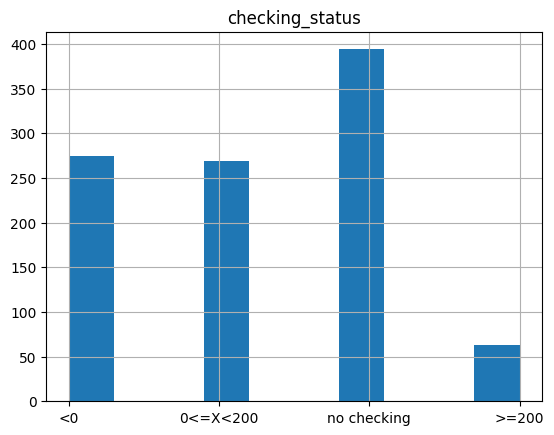

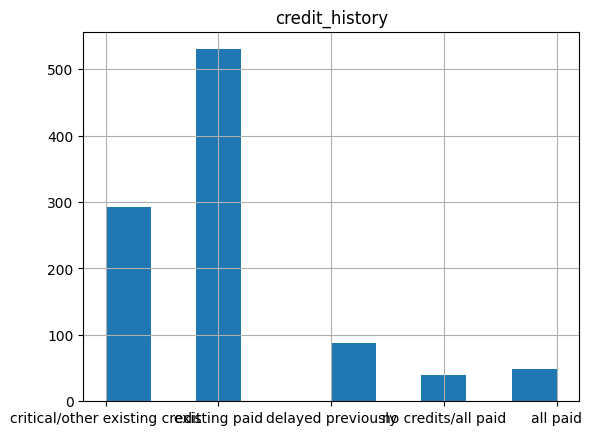

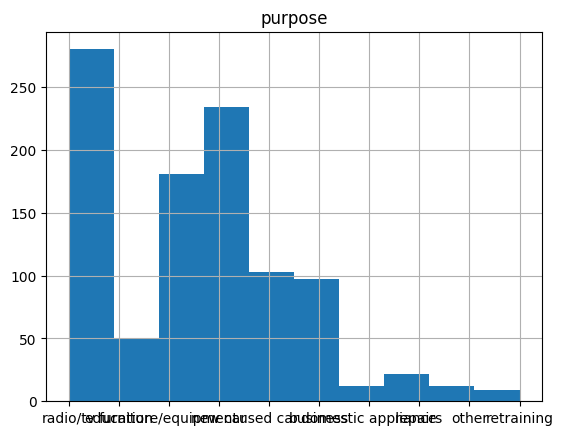

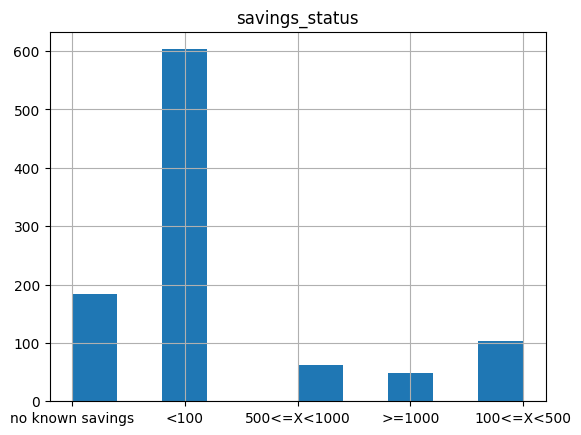

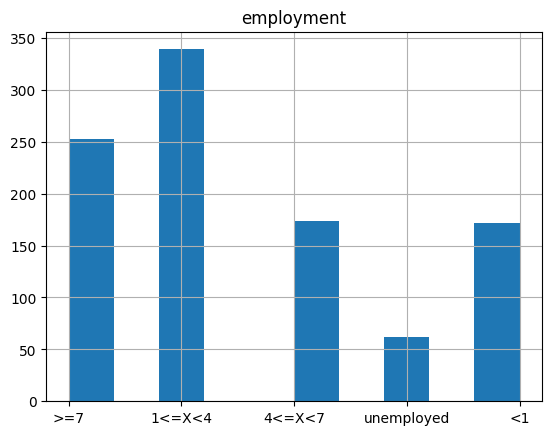

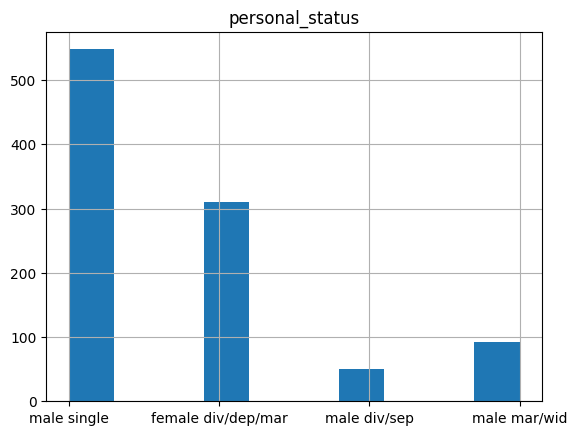

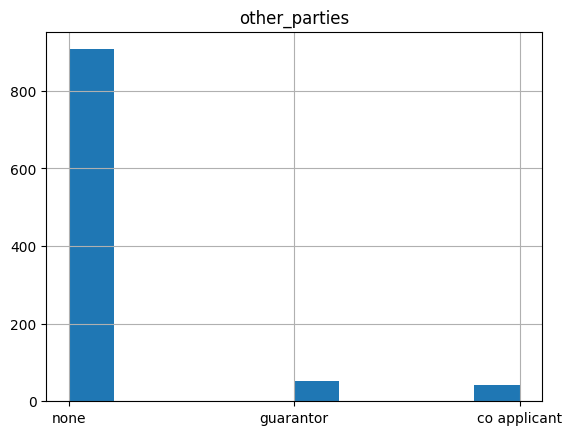

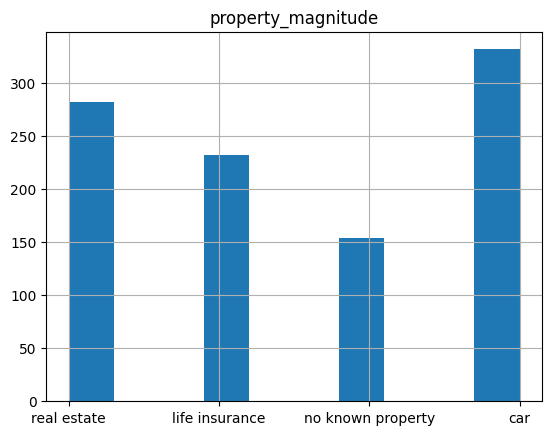

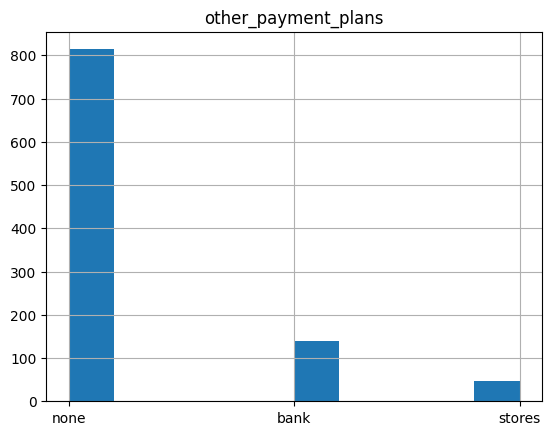

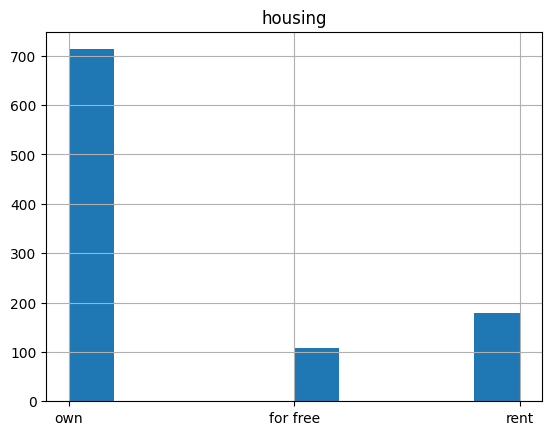

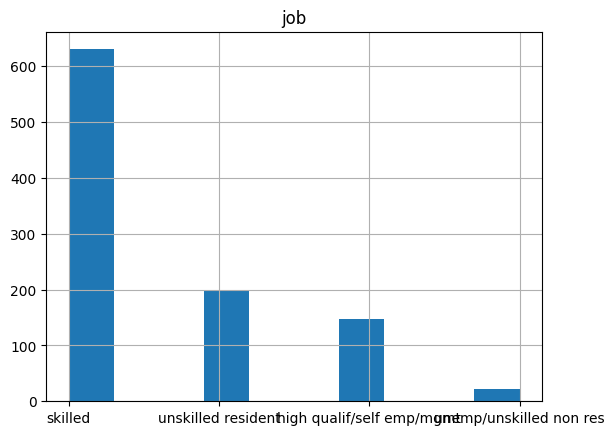

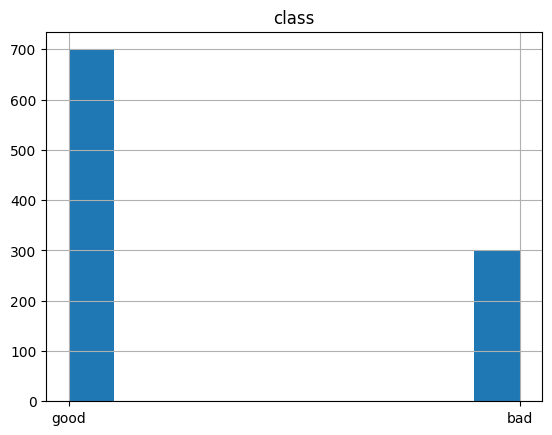

In [98]:
for i in categorical_features:
    credit_data[i].hist()
    # Add titles and labels
    plt.title(i)
    # Show the plot
    plt.show()

In [99]:

for i in categorical_features:
    print('--------------------')
    print(credit_data[i].value_counts())
    

--------------------
checking_status
no checking    394
<0             274
0<=X<200       269
>=200           63
Name: count, dtype: int64
--------------------
credit_history
existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: count, dtype: int64
--------------------
purpose
radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
Name: count, dtype: int64
--------------------
savings_status
<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: count, dtype: int64
--------------------
employment
1<=X<4        339
>=7           253
4<=X<7        174
<1            17

In [101]:
credit_data['credit_history'] = replace_value('credit_history',['no credits/all paid'],'all paid', credit_data)
credit_data['purpose'] = replace_value('purpose',['retraining','domestic appliance','repairs'],'other', credit_data)

In [102]:
print(credit_data['purpose'].unique())

['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'other']


In [103]:
def replace_value(name_column, replace_v, new_value, df):
    for i in replace_v:
        df[name_column] = df[name_column].replace(i, new_value)
    return df[name_column]


In [124]:
def hot_dummies(categorical, df,num):
    df_dummies = pd.get_dummies(df[categorical]).astype(float)
    for i in num:
        df_dummies[i]= df[i]
    return df_dummies


In [125]:
cf = categorical_features.to_numpy()
cf2 = cf[:-1]
print(cf2)

['checking_status' 'credit_history' 'purpose' 'savings_status'
 'employment' 'personal_status' 'other_parties' 'property_magnitude'
 'other_payment_plans' 'housing' 'job']


In [126]:
df = hot_dummies(cf2, credit_data, numerical_features)


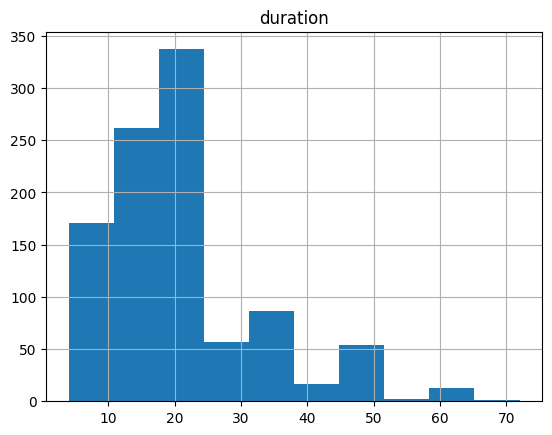

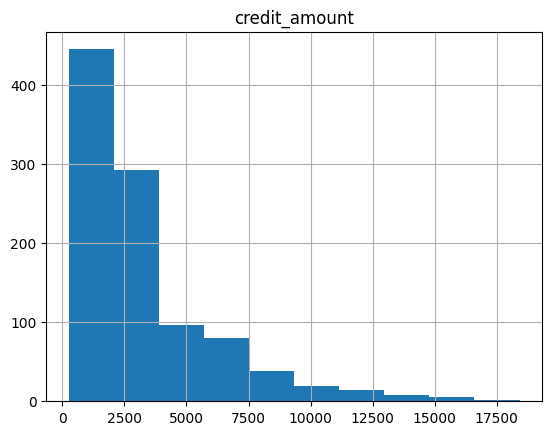

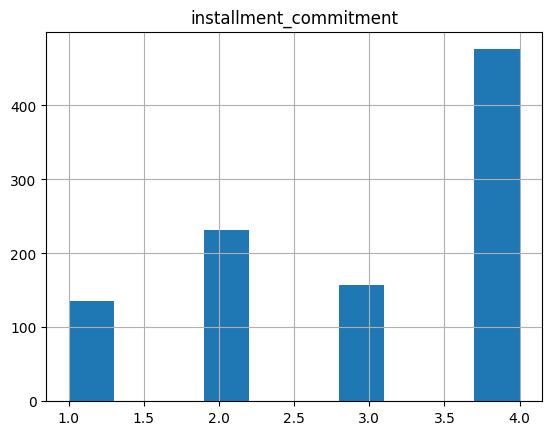

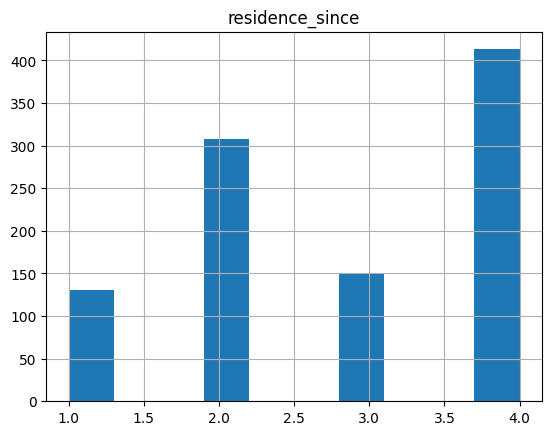

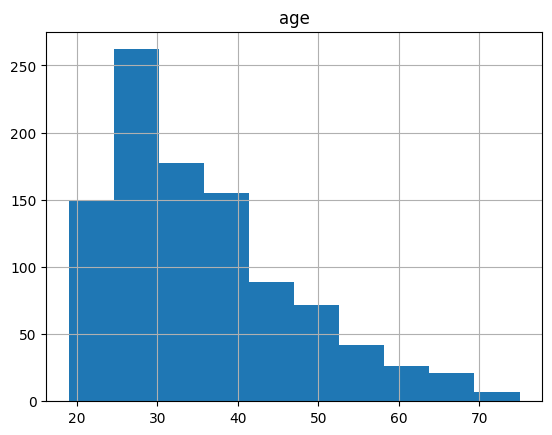

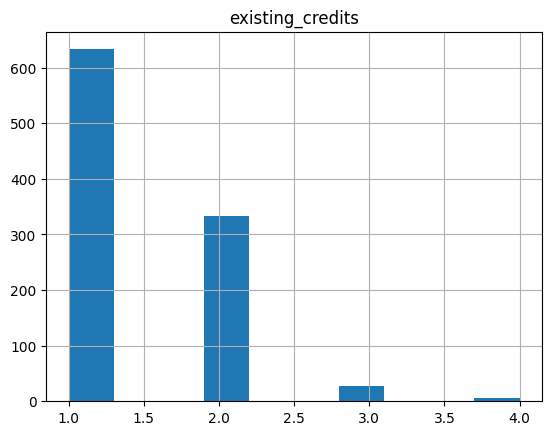

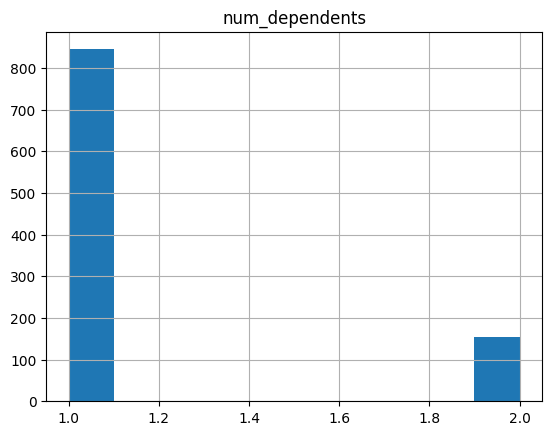

In [111]:
for i in numerical_features:
    df[i].hist()
    # Add titles and labels
    plt.title(i)
    # Show the plot
    plt.show()

In [112]:

for i in numerical_features:
    print('--------------------')
    print(credit_data[i].value_counts())
    

--------------------
duration
24.0    184
12.0    179
18.0    113
36.0     83
6.0      75
15.0     64
9.0      49
48.0     48
30.0     40
21.0     30
10.0     28
60.0     13
27.0     13
42.0     11
11.0      9
20.0      8
8.0       7
4.0       6
45.0      5
7.0       5
39.0      5
14.0      4
13.0      4
33.0      3
28.0      3
54.0      2
16.0      2
22.0      2
47.0      1
5.0       1
26.0      1
72.0      1
40.0      1
Name: count, dtype: int64
--------------------
credit_amount
1478.0    3
1262.0    3
1258.0    3
1275.0    3
1393.0    3
         ..
1459.0    1
882.0     1
3758.0    1
1136.0    1
4576.0    1
Name: count, Length: 921, dtype: int64
--------------------
installment_commitment
4.0    476
2.0    231
3.0    157
1.0    136
Name: count, dtype: int64
--------------------
residence_since
4.0    413
2.0    308
3.0    149
1.0    130
Name: count, dtype: int64
--------------------
age
27.0    51
26.0    50
23.0    48
24.0    44
28.0    43
25.0    41
30.0    40
35.0    40
36.0    

In [115]:
def scaleit(df,columns):
    min_max = MinMaxScaler().fit(df[columns])
    min_max_X = min_max.transform(df[columns])
    pandas_min_max = pd.DataFrame(min_max_X, columns=columns)
    for i in columns:
        df[i] = pandas_min_max[i]
    return df


In [116]:
print(df.columns)
df_scale = scaleit(df, numerical_features)

Index(['checking_status_0<=X<200', 'checking_status_<0',
       'checking_status_>=200', 'checking_status_no checking',
       'credit_history_all paid',
       'credit_history_critical/other existing credit',
       'credit_history_delayed previously', 'credit_history_existing paid',
       'purpose_business', 'purpose_education', 'purpose_furniture/equipment',
       'purpose_new car', 'purpose_other', 'purpose_radio/tv',
       'purpose_used car', 'savings_status_100<=X<500',
       'savings_status_500<=X<1000', 'savings_status_<100',
       'savings_status_>=1000', 'savings_status_no known savings',
       'employment_1<=X<4', 'employment_4<=X<7', 'employment_<1',
       'employment_>=7', 'employment_unemployed',
       'personal_status_female div/dep/mar', 'personal_status_male div/sep',
       'personal_status_male mar/wid', 'personal_status_male single',
       'other_parties_co applicant', 'other_parties_guarantor',
       'other_parties_none', 'property_magnitude_car',
       

In [127]:
print(df.dtypes)

checking_status_0<=X<200                         float64
checking_status_<0                               float64
checking_status_>=200                            float64
checking_status_no checking                      float64
credit_history_all paid                          float64
credit_history_critical/other existing credit    float64
credit_history_delayed previously                float64
credit_history_existing paid                     float64
purpose_business                                 float64
purpose_education                                float64
purpose_furniture/equipment                      float64
purpose_new car                                  float64
purpose_other                                    float64
purpose_radio/tv                                 float64
purpose_used car                                 float64
savings_status_100<=X<500                        float64
savings_status_500<=X<1000                       float64
savings_status_<100            